In [ ]:
!pip install transformers
!pip install torch
!pip install datasets

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
# Install necessary libraries
!pip install    accelerate -U datasets

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Map:   0%|          | 0/134698 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.314200,0.475593,0.818807,0.816279,0.843750,0.790541
2,0.246400,0.565603,0.807339,0.818182,0.787500,0.851351
3,0.221900,0.530543,0.813073,0.818283,0.810155,0.826577
4,0.190400,0.696170,0.803899,0.817503,0.776876,0.862613


Training and Evaluation Metrics:
{'train_loss': [0.645, 0.5151, 0.4655, 0.4278, 0.4131, 0.3988, 0.3782, 0.3678, 0.3629, 0.3563, 0.3362, 0.3306, 0.3258, 0.3127, 0.3153, 0.3142, 0.2947, 0.2821, 0.2656, 0.2786, 0.2772, 0.2648, 0.2627, 0.2543, 0.2683, 0.2699, 0.2613, 0.2528, 0.2497, 0.2716, 0.244, 0.245, 0.2464, 0.2367, 0.2268, 0.2292, 0.2311, 0.2172, 0.2309, 0.2254, 0.2286, 0.2184, 0.2258, 0.2297, 0.2188, 0.2205, 0.2138, 0.2103, 0.2182, 0.2219, 0.2039, 0.2046, 0.1911, 0.1936, 0.1896, 0.2001, 0.1988, 0.2029, 0.1919, 0.1929, 0.1972, 0.1928, 0.1859, 0.199, 0.1985, 0.1849, 0.1904], 'eval_loss': [0.4755934178829193, 0.5656028389930725, 0.5305432081222534, 0.6961702108383179], 'train_accuracy': [], 'eval_accuracy': [0.8188073394495413, 0.8073394495412844, 0.8130733944954128, 0.8038990825688074]}


ValueError: x and y must have same first dimension, but have shapes (67,) and (4,)

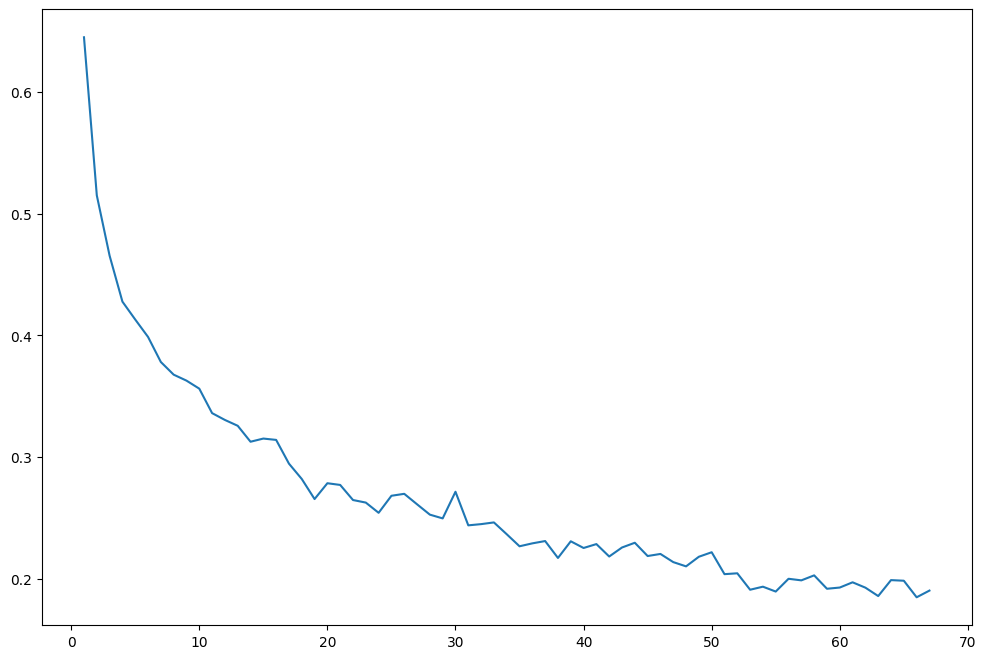

In [ ]:
import torch
from transformers import BertConfig, BertForSequenceClassification, BertTokenizerFast
from transformers import TrainingArguments, Trainer, TrainerCallback, EvalPrediction, EarlyStoppingCallback
from datasets import load_dataset, load_metric, Dataset
from google.colab import drive
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Dataset and Tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
dataset = load_dataset("stanfordnlp/sst2")

# Tokenization Function
def tokenize_function(examples):
    return tokenizer(examples["sentence"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Data Augmentation Function (Synonym Replacement)
def augment_sentence(sentence):
    words = sentence.split()
    new_sentence = words.copy()
    for i in range(len(words)):
        synonyms = wordnet.synsets(words[i])
        if synonyms:
            new_sentence[i] = synonyms[0].lemmas()[0].name()
    return ' '.join(new_sentence)

nltk.download('wordnet')
augmented_sentences = [augment_sentence(sentence) for sentence in tokenized_datasets['train']['sentence']]
augmented_labels = tokenized_datasets['train']['label']

# Create Augmented Dataset
augmented_data = {'sentence': tokenized_datasets['train']['sentence'] + augmented_sentences, 'label': tokenized_datasets['train']['label'] + augmented_labels}
augmented_dataset = Dataset.from_dict(augmented_data)

# Tokenize Augmented Dataset
augmented_tokenized_datasets = augmented_dataset.map(tokenize_function, batched=True)

# Create Custom Student Model for SST-2 with Dropout Regularization
def create_custom_student_model():
    student_config = BertConfig.from_pretrained("bert-base-uncased")
    student_config.hidden_size = 384
    student_config.num_attention_heads = 6
    student_config.num_hidden_layers = 6  # Reduce the number of layers for a smaller model
    student_config.intermediate_size = 3072
    student_config.hidden_dropout_prob = 0.3  # Added dropout regularization
    student_config.attention_probs_dropout_prob = 0.3  # Added dropout regularization
    return BertForSequenceClassification(student_config)

student_model = create_custom_student_model().to(device)

# Load Model State Dict from Google Drive
model_path = '/content/drive/MyDrive/distillation_models_2/student_6_6_3072_model_final.pth'
state_dict = torch.load(model_path, map_location=device)

# Filter the state dictionary to ensure compatibility
new_state_dict = {}
for key, value in state_dict.items():
    if key.startswith("bert.") or key.startswith("classifier."):
        new_state_dict[key] = value

student_model.load_state_dict(new_state_dict, strict=False)

# Training Arguments and Trainer Setup
training_args = TrainingArguments(
    per_device_train_batch_size=16,  # Increased batch size
    per_device_eval_batch_size=16,
    num_train_epochs=10,  # Increased number of epochs
    learning_rate=3e-5,  # Adjusted learning rate
    eval_strategy="epoch",
    logging_dir='./logs_sst2',
    logging_steps=500,
    do_train=True,
    do_eval=True,
    output_dir='./results_sst2',
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_strategy="epoch",
    report_to="none",  # Disable default reporting to remove unnecessary logging
    weight_decay=0.01,  # Added weight decay for regularization
    lr_scheduler_type="linear",  # Added learning rate scheduler
    warmup_steps=500  # Added warmup steps
)

# Define Metrics Calculation
metric = load_metric("accuracy")
f1_metric = load_metric("f1")
precision_metric = load_metric("precision")
recall_metric = load_metric("recall")

def compute_metrics(p: EvalPrediction):
    preds = p.predictions.argmax(-1)
    accuracy = metric.compute(predictions=preds, references=p.label_ids)["accuracy"]
    f1 = f1_metric.compute(predictions=preds, references=p.label_ids)["f1"]
    precision = precision_metric.compute(predictions=preds, references=p.label_ids)["precision"]
    recall = recall_metric.compute(predictions=preds, references=p.label_ids)["recall"]
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# Define Trainer Callback for Metrics Logging
class MetricsCallback(TrainerCallback):
    def __init__(self):
        self.metrics = {"train_loss": [], "eval_loss": [], "train_accuracy": [], "eval_accuracy": []}

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            if "loss" in logs:
                self.metrics["train_loss"].append(logs["loss"])
            if "eval_loss" in logs:
                self.metrics["eval_loss"].append(logs["eval_loss"])
            if "eval_accuracy" in logs:
                self.metrics["eval_accuracy"].append(logs["eval_accuracy"])
            if "train_accuracy" in logs:
                self.metrics["train_accuracy"].append(logs["train_accuracy"])

metrics_callback = MetricsCallback()

# Set up Trainer with Early Stopping
early_stopping = EarlyStoppingCallback(early_stopping_patience=3)

trainer = Trainer(
    model=student_model,
    args=training_args,
    train_dataset=augmented_tokenized_datasets,  # Use augmented tokenized dataset for training
    eval_dataset=tokenized_datasets["validation"],  # Use validation set for evaluation during training
    compute_metrics=compute_metrics,
    callbacks=[metrics_callback, early_stopping]
)

# Train and Evaluate the Model
trainer.train()

# Print Metrics
print("Training and Evaluation Metrics:")
print(metrics_callback.metrics)

# Plot the Metrics
def plot_metrics(metrics):
    plt.figure(figsize=(12, 8))
    epochs = range(1, len(metrics["train_loss"]) + 1)

    plt.plot(epochs, metrics["train_loss"], label="Training Loss")
    plt.plot(epochs, metrics["eval_loss"], label="Validation Loss")
    plt.plot(epochs, metrics["train_accuracy"], label="Training Accuracy")
    plt.plot(epochs, metrics["eval_accuracy"], label="Validation Accuracy")

    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.legend()
    plt.title("Training and Validation Metrics")
    plt.show()

plot_metrics(metrics_callback.metrics)

# Generate Confusion Matrix and Classification Report using Test Set
def plot_confusion_matrix_and_classification_report(trainer, eval_dataset):
    predictions, labels, _ = trainer.predict(eval_dataset)
    preds = np.argmax(predictions, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(labels, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Report
    report = classification_report(labels, preds, target_names=['Negative', 'Positive'])
    print("Classification Report:")
    print(report)

# Plot Confusion Matrix and Classification Report for Test Set
plot_confusion_matrix_and_classification_report(trainer, tokenized_datasets["test"])  # Use test set for final evaluation


Mounted at /content/drive


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/4358 [00:00<?, ? examples/s]

Map:   0%|          | 0/36718 [00:00<?, ? examples/s]

Map:   0%|          | 0/3760 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch 1/10, Step 0/4590, Loss: 682.14453125
Epoch 1/10, Step 100/4590, Loss: 504.1337890625
Epoch 1/10, Step 200/4590, Loss: 366.5269775390625
Epoch 1/10, Step 300/4590, Loss: 208.94969177246094
Epoch 1/10, Step 400/4590, Loss: 281.1177062988281
Epoch 1/10, Step 500/4590, Loss: 281.3868103027344
Epoch 1/10, Step 600/4590, Loss: 252.75360107421875
Epoch 1/10, Step 700/4590, Loss: 113.57774353027344
Epoch 1/10, Step 800/4590, Loss: 202.22674560546875
Epoch 1/10, Step 900/4590, Loss: 131.81529235839844
Epoch 1/10, Step 1000/4590, Loss: 177.23707580566406
Epoch 1/10, Step 1100/4590, Loss: 106.91500854492188
Epoch 1/10, Step 1200/4590, Loss: 186.07521057128906
Epoch 1/10, Step 1300/4590, Loss: 91.71424102783203
Epoch 1/10, Step 1400/4590, Loss: 192.07350158691406
Epoch 1/10, Step 1500/4590, Loss: 156.41757202148438
Epoch 1/10, Step 1600/4590, Loss: 157.0931396484375
Epoch 1/10, Step 1700/4590, Loss: 162.5814208984375
Epoch 1/10, Step 1800/4590, Loss: 152.38302612304688
Epoch 1/10, Step 1900

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Epoch 1, Average Training Loss: 151.28816539124466, Average Validation Loss: 93.54635362422212, Training Accuracy: 31.931205403344407, Validation Accuracy: 44.714095744680854, Training Precision: 0.319586300936417, Training Recall: 0.3493288730053192, Training F1: 0.3236176385159412
Model saved to /content/drive/MyDrive/distillation_models/student_model_epoch_1.pth
Epoch 2/10, Step 0/4590, Loss: 61.29601287841797
Epoch 2/10, Step 100/4590, Loss: 15.019607543945312
Epoch 2/10, Step 200/4590, Loss: 49.662601470947266
Epoch 2/10, Step 300/4590, Loss: 121.75037384033203
Epoch 2/10, Step 400/4590, Loss: 149.05531311035156
Epoch 2/10, Step 500/4590, Loss: 52.359375
Epoch 2/10, Step 600/4590, Loss: 79.92781066894531
Epoch 2/10, Step 700/4590, Loss: 46.4398193359375
Epoch 2/10, Step 800/4590, Loss: 93.58816528320312
Epoch 2/10, Step 900/4590, Loss: 79.99247741699219
Epoch 2/10, Step 1000/4590, Loss: 68.24458312988281
Epoch 2/10, Step 1100/4590, Loss: 43.002708435058594
Epoch 2/10, Step 1200/45

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2, Average Training Loss: 82.71594655485195, Average Validation Loss: 77.42312987510194, Training Accuracy: 43.899368157307045, Validation Accuracy: 45.73351063829787, Training Precision: 0.31601494037133754, Training Recall: 0.3572930518617021, Training F1: 0.3238753128516744
Model saved to /content/drive/MyDrive/distillation_models/student_model_epoch_2.pth
Epoch 3/10, Step 0/4590, Loss: 83.60263061523438
Epoch 3/10, Step 100/4590, Loss: 56.051246643066406
Epoch 3/10, Step 200/4590, Loss: 86.85231018066406
Epoch 3/10, Step 300/4590, Loss: 63.83436584472656
Epoch 3/10, Step 400/4590, Loss: 83.10254669189453
Epoch 3/10, Step 500/4590, Loss: 90.71665954589844
Epoch 3/10, Step 600/4590, Loss: 94.53318786621094
Epoch 3/10, Step 700/4590, Loss: 120.20442199707031
Epoch 3/10, Step 800/4590, Loss: 90.17515563964844
Epoch 3/10, Step 900/4590, Loss: 62.40015411376953
Epoch 3/10, Step 1000/4590, Loss: 80.46589660644531
Epoch 3/10, Step 1100/4590, Loss: 48.296993255615234
Epoch 3/10, Step 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3, Average Training Loss: 70.7090150383303, Average Validation Loss: 70.50450955045984, Training Accuracy: 44.64477912740345, Validation Accuracy: 45.92978723404255, Training Precision: 0.3124904193911358, Training Recall: 0.3588264627659574, Training F1: 0.32246793969101906
Model saved to /content/drive/MyDrive/distillation_models/student_model_epoch_3.pth
Epoch 4/10, Step 0/4590, Loss: 95.07365417480469
Epoch 4/10, Step 100/4590, Loss: 15.771427154541016
Epoch 4/10, Step 200/4590, Loss: 80.36811828613281
Epoch 4/10, Step 300/4590, Loss: 68.47279357910156
Epoch 4/10, Step 400/4590, Loss: 74.90496826171875
Epoch 4/10, Step 500/4590, Loss: 46.483917236328125
Epoch 4/10, Step 600/4590, Loss: 69.47171783447266
Epoch 4/10, Step 700/4590, Loss: 56.092857360839844
Epoch 4/10, Step 800/4590, Loss: 86.88482666015625
Epoch 4/10, Step 900/4590, Loss: 48.112586975097656
Epoch 4/10, Step 1000/4590, Loss: 69.98176574707031
Epoch 4/10, Step 1100/4590, Loss: 81.47808837890625
Epoch 4/10, Step 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Epoch 4, Average Training Loss: 64.69304756009241, Average Validation Loss: 65.94394034426263, Training Accuracy: 44.89634511683643, Validation Accuracy: 46.10186170212766, Training Precision: 0.3056939239181485, Training Recall: 0.3601707945478723, Training F1: 0.3181054318591513
Model saved to /content/drive/MyDrive/distillation_models/student_model_epoch_4.pth
Epoch 5/10, Step 0/4590, Loss: 15.90213394165039
Epoch 5/10, Step 100/4590, Loss: 61.06454086303711
Epoch 5/10, Step 200/4590, Loss: 32.793922424316406
Epoch 5/10, Step 300/4590, Loss: 64.62207794189453
Epoch 5/10, Step 400/4590, Loss: 95.28466796875
Epoch 5/10, Step 500/4590, Loss: 68.98384094238281
Epoch 5/10, Step 600/4590, Loss: 82.18341064453125
Epoch 5/10, Step 700/4590, Loss: 61.19383239746094
Epoch 5/10, Step 800/4590, Loss: 73.10897064208984
Epoch 5/10, Step 900/4590, Loss: 37.84218978881836
Epoch 5/10, Step 1000/4590, Loss: 77.7755126953125
Epoch 5/10, Step 1100/4590, Loss: 92.16627502441406
Epoch 5/10, Step 1200/459

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Epoch 5, Average Training Loss: 60.6144469492316, Average Validation Loss: 62.49122336773162, Training Accuracy: 45.00991339397571, Validation Accuracy: 46.211436170212764, Training Precision: 0.3020465864943828, Training Recall: 0.3610268450797872, Training F1: 0.31700484930760636
Model saved to /content/drive/MyDrive/distillation_models/student_model_epoch_5.pth
Epoch 6/10, Step 0/4590, Loss: 69.73406982421875
Epoch 6/10, Step 100/4590, Loss: 45.206642150878906
Epoch 6/10, Step 200/4590, Loss: 85.934326171875
Epoch 6/10, Step 300/4590, Loss: 79.365478515625
Epoch 6/10, Step 400/4590, Loss: 53.495975494384766
Epoch 6/10, Step 500/4590, Loss: 47.95185089111328
Epoch 6/10, Step 600/4590, Loss: 50.91809844970703
Epoch 6/10, Step 700/4590, Loss: 86.28338623046875
Epoch 6/10, Step 800/4590, Loss: 60.90790557861328
Epoch 6/10, Step 900/4590, Loss: 88.92343139648438
Epoch 6/10, Step 1000/4590, Loss: 58.626670837402344
Epoch 6/10, Step 1100/4590, Loss: 86.26044464111328
Epoch 6/10, Step 1200/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Epoch 6, Average Training Loss: 57.361951423418546, Average Validation Loss: 60.0365936238715, Training Accuracy: 45.065254098807124, Validation Accuracy: 46.13909574468085, Training Precision: 0.3044073899279757, Training Recall: 0.36046168550531915, Training F1: 0.318918910894781
Model saved to /content/drive/MyDrive/distillation_models/student_model_epoch_6.pth
Epoch 7/10, Step 0/4590, Loss: 84.81704711914062
Epoch 7/10, Step 100/4590, Loss: 74.58824157714844
Epoch 7/10, Step 200/4590, Loss: 100.9981689453125
Epoch 7/10, Step 300/4590, Loss: 56.829837799072266
Epoch 7/10, Step 400/4590, Loss: 73.6607666015625
Epoch 7/10, Step 500/4590, Loss: 57.9027099609375
Epoch 7/10, Step 600/4590, Loss: 8.877153396606445
Epoch 7/10, Step 700/4590, Loss: 35.86682891845703
Epoch 7/10, Step 800/4590, Loss: 59.71991729736328
Epoch 7/10, Step 900/4590, Loss: 68.8600082397461
Epoch 7/10, Step 1000/4590, Loss: 72.06040954589844
Epoch 7/10, Step 1100/4590, Loss: 51.43117904663086
Epoch 7/10, Step 1200/4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Epoch 7, Average Training Loss: 55.09425118042233, Average Validation Loss: 58.154368703923325, Training Accuracy: 45.10297401819271, Validation Accuracy: 46.19175531914894, Training Precision: 0.30109314865999054, Training Recall: 0.3608730884308511, Training F1: 0.3170723373133531
Model saved to /content/drive/MyDrive/distillation_models/student_model_epoch_7.pth
Epoch 8/10, Step 0/4590, Loss: 76.91644287109375
Epoch 8/10, Step 100/4590, Loss: 25.892074584960938
Epoch 8/10, Step 200/4590, Loss: 47.9129524230957
Epoch 8/10, Step 300/4590, Loss: 43.03763961791992
Epoch 8/10, Step 400/4590, Loss: 54.82908248901367
Epoch 8/10, Step 500/4590, Loss: 32.12356185913086
Epoch 8/10, Step 600/4590, Loss: 69.70289611816406
Epoch 8/10, Step 700/4590, Loss: 65.94023895263672
Epoch 8/10, Step 800/4590, Loss: 54.28578567504883
Epoch 8/10, Step 900/4590, Loss: 34.6341552734375
Epoch 8/10, Step 1000/4590, Loss: 56.11284637451172
Epoch 8/10, Step 1100/4590, Loss: 31.97333335876465
Epoch 8/10, Step 1200

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Epoch 8, Average Training Loss: 53.48737072607011, Average Validation Loss: 56.817937081925415, Training Accuracy: 45.12198376817909, Validation Accuracy: 46.19654255319149, Training Precision: 0.29849094294380013, Training Recall: 0.36091048869680853, Training F1: 0.31534746385194906
Model saved to /content/drive/MyDrive/distillation_models/student_model_epoch_8.pth
Epoch 9/10, Step 0/4590, Loss: 54.1351318359375
Epoch 9/10, Step 100/4590, Loss: 67.1664810180664
Epoch 9/10, Step 200/4590, Loss: 53.39035415649414
Epoch 9/10, Step 300/4590, Loss: 60.759796142578125
Epoch 9/10, Step 400/4590, Loss: 49.12975311279297
Epoch 9/10, Step 500/4590, Loss: 19.715679168701172
Epoch 9/10, Step 600/4590, Loss: 57.566261291503906
Epoch 9/10, Step 700/4590, Loss: 44.496612548828125
Epoch 9/10, Step 800/4590, Loss: 69.71159362792969
Epoch 9/10, Step 900/4590, Loss: 22.608369827270508
Epoch 9/10, Step 1000/4590, Loss: 35.26253128051758
Epoch 9/10, Step 1100/4590, Loss: 51.83370590209961
Epoch 9/10, Ste

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Epoch 9, Average Training Loss: 52.387726701630484, Average Validation Loss: 56.238827494864765, Training Accuracy: 45.130235851625905, Validation Accuracy: 46.24787234042553, Training Precision: 0.29966539871220627, Training Recall: 0.36131150265957446, Training F1: 0.3165896047590553
Model saved to /content/drive/MyDrive/distillation_models/student_model_epoch_9.pth
Epoch 10/10, Step 0/4590, Loss: 36.34516143798828
Epoch 10/10, Step 100/4590, Loss: 61.381866455078125
Epoch 10/10, Step 200/4590, Loss: 63.929141998291016
Epoch 10/10, Step 300/4590, Loss: 32.20256042480469
Epoch 10/10, Step 400/4590, Loss: 45.133174896240234
Epoch 10/10, Step 500/4590, Loss: 51.472145080566406
Epoch 10/10, Step 600/4590, Loss: 66.45257568359375
Epoch 10/10, Step 700/4590, Loss: 55.522674560546875
Epoch 10/10, Step 800/4590, Loss: 57.49031066894531
Epoch 10/10, Step 900/4590, Loss: 15.350876808166504
Epoch 10/10, Step 1000/4590, Loss: 73.13888549804688
Epoch 10/10, Step 1100/4590, Loss: 40.78213500976562

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Epoch 10, Average Training Loss: 51.72042397817755, Average Validation Loss: 55.9665825843811, Training Accuracy: 45.13151587777112, Validation Accuracy: 46.25425531914894, Training Precision: 0.2987213309027535, Training Recall: 0.3613613696808511, Training F1: 0.31601256156352586
Model saved to /content/drive/MyDrive/distillation_models/student_model_epoch_10.pth
Model saved to /content/drive/MyDrive/distillation_models/student_6_6_3072_model_final.pth


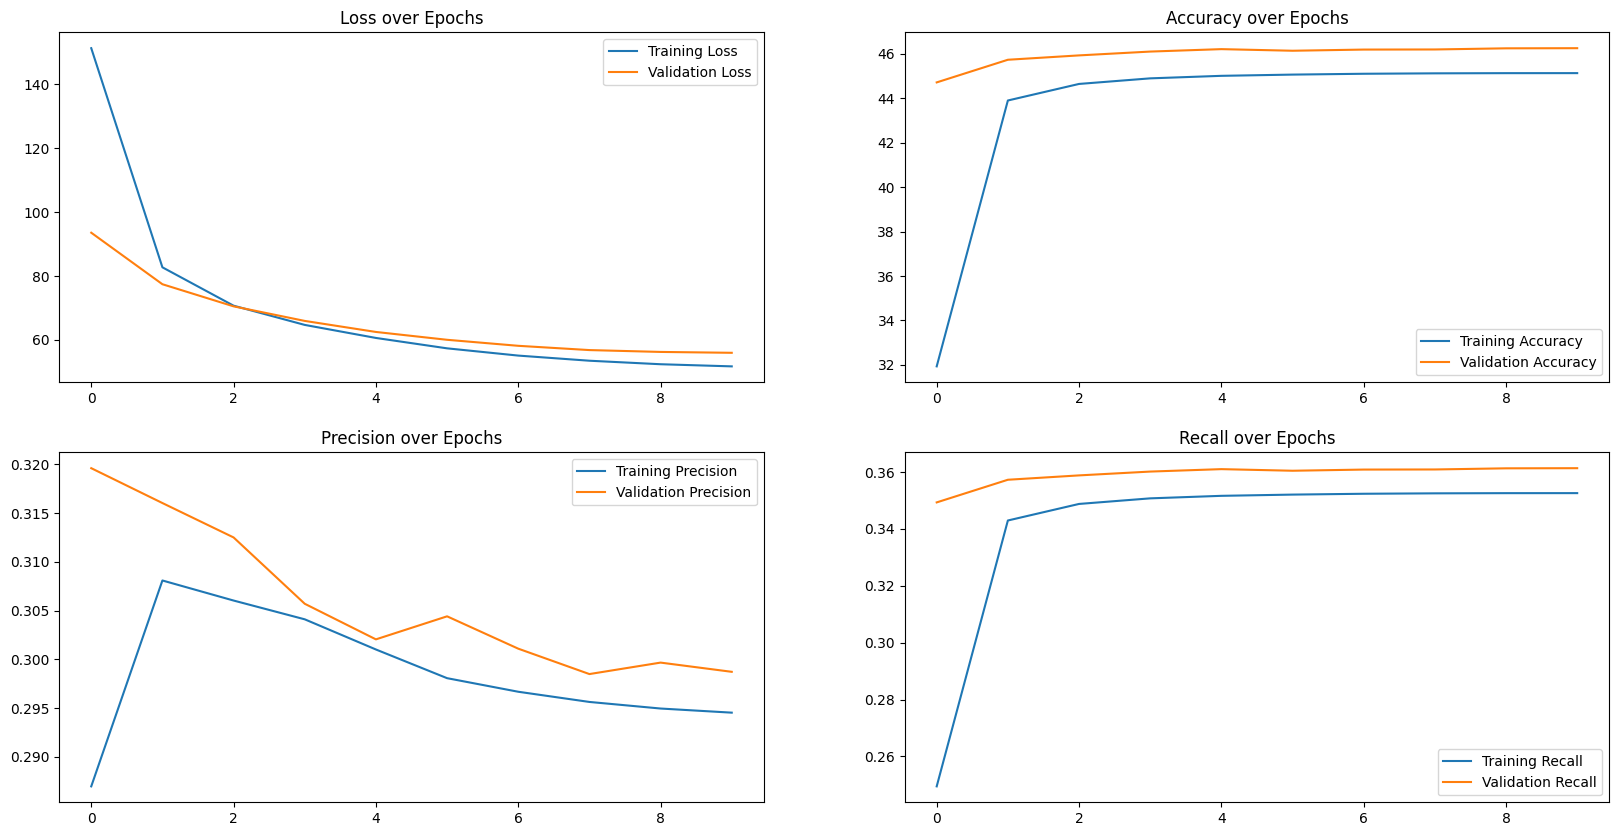

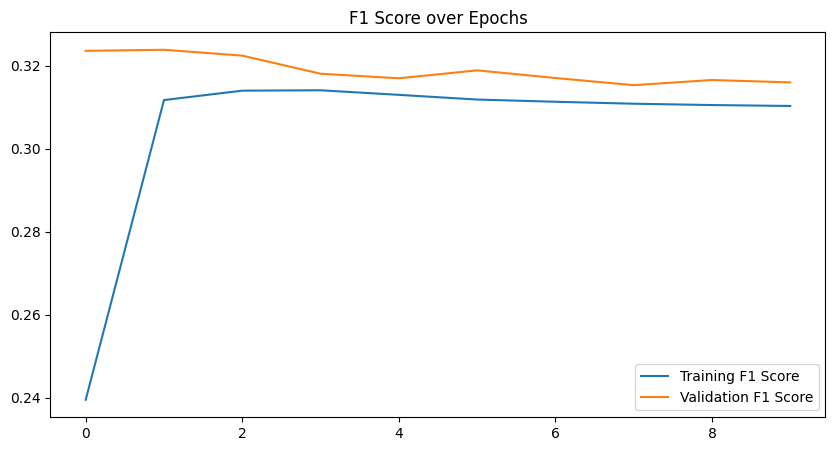

In [ ]:
import os
import torch
from transformers import BertForMaskedLM, BertTokenizer, BertConfig, AdamW
from transformers import get_linear_schedule_with_warmup
from datasets import load_dataset
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from torch.cuda.amp import autocast, GradScaler
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from google.colab import drive



# Directory to save models on Google Drive
save_directory = '/content/drive/MyDrive/distillation_models'

# Ensure the directory exists
os.makedirs(save_directory, exist_ok=True)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Clear unnecessary files to free up space
def clear_cache():
    os.system('rm -rf /root/.cache/huggingface')
    os.system('rm -rf /root/.cache/torch')

# Custom Student Model Creation
def create_custom_student_model():
    student_config = BertConfig.from_pretrained("bert-base-uncased")
    student_config.hidden_size = 384
    student_config.num_attention_heads = 6
    student_config.num_hidden_layers = 6  # Reduce the number of layers for a smaller model
    student_config.intermediate_size = 3072
    return BertForMaskedLM(student_config)

# Distillation Loss Function
def distillation_loss(teacher_logits, student_logits, temperature=2.0):
    return torch.nn.KLDivLoss(reduction="batchmean")(
        torch.nn.functional.log_softmax(student_logits / temperature, dim=-1),
        torch.nn.functional.softmax(teacher_logits / temperature, dim=-1)
    )

# Tokenize the dataset
def tokenize_function(tokenizer, examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=128, return_attention_mask=True)

# DataLoader for efficient batching
def get_dataloader(data, batch_size=8, is_train=True):
    sampler = RandomSampler(data) if is_train else SequentialSampler(data)
    return DataLoader(data, sampler=sampler, batch_size=batch_size, collate_fn=lambda x: {k: torch.tensor([d[k] for d in x]) for k in x[0]})

# Training Loop with Distillation
def train_student_with_distillation(teacher_model, student_model, train_data, val_data, tokenizer, temperature=2.0, epochs=10, batch_size=8):
    optimizer = AdamW(student_model.parameters(), lr=5e-5)
    scaler = GradScaler()
    train_dataloader = get_dataloader(train_data, batch_size=batch_size, is_train=True)
    val_dataloader = get_dataloader(val_data, batch_size=batch_size, is_train=False)
    total_steps = len(train_dataloader) * epochs
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    train_precisions = []
    val_precisions = []
    train_recalls = []
    val_recalls = []
    train_f1s = []
    val_f1s = []

    for epoch in range(epochs):
        student_model.train()
        total_loss = 0.0
        correct_predictions = 0
        true_labels = []
        pred_labels = []

        for step, batch in enumerate(train_dataloader):
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)

            with autocast():
                student_outputs = student_model(input_ids=input_ids, attention_mask=attention_mask)
                student_logits = student_outputs.logits

                with torch.no_grad():
                    teacher_outputs = teacher_model(input_ids=input_ids, attention_mask=attention_mask)
                    teacher_logits = teacher_outputs.logits

                loss = distillation_loss(teacher_logits, student_logits, temperature)
                total_loss += loss.item()

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
            scheduler.step()

            predictions = torch.argmax(student_logits, dim=-1)
            correct_predictions += torch.sum(predictions == input_ids).item()
            true_labels.extend(input_ids.cpu().numpy().flatten())
            pred_labels.extend(predictions.cpu().numpy().flatten())

            if step % 100 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Step {step}/{len(train_dataloader)}, Loss: {loss.item()}")

        avg_loss = total_loss / len(train_dataloader)
        train_losses.append(avg_loss)
        train_acc = correct_predictions / len(train_dataloader.dataset)
        train_accuracies.append(train_acc)
        precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
        train_precisions.append(precision)
        train_recalls.append(recall)
        train_f1s.append(f1)

        # Evaluate on validation set
        student_model.eval()
        val_loss = 0.0
        correct_predictions = 0
        true_labels = []
        pred_labels = []

        with torch.no_grad():
            for batch in val_dataloader:
                input_ids = batch["input_ids"].to(device)
                attention_mask = batch["attention_mask"].to(device)

                student_outputs = student_model(input_ids=input_ids, attention_mask=attention_mask)
                student_logits = student_outputs.logits

                teacher_outputs = teacher_model(input_ids=input_ids, attention_mask=attention_mask)
                teacher_logits = teacher_outputs.logits

                loss = distillation_loss(teacher_logits, student_logits, temperature)
                val_loss += loss.item()

                predictions = torch.argmax(student_logits, dim=-1)
                correct_predictions += torch.sum(predictions == input_ids).item()
                true_labels.extend(input_ids.cpu().numpy().flatten())
                pred_labels.extend(predictions.cpu().numpy().flatten())

        avg_val_loss = val_loss / len(val_dataloader)
        val_losses.append(avg_val_loss)
        val_acc = correct_predictions / len(val_dataloader.dataset)
        val_accuracies.append(val_acc)
        precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
        val_precisions.append(precision)
        val_recalls.append(recall)
        val_f1s.append(f1)

        print(f"Epoch {epoch + 1}, Average Training Loss: {avg_loss}, Average Validation Loss: {avg_val_loss}, Training Accuracy: {train_acc}, Validation Accuracy: {val_acc}, Training Precision: {precision}, Training Recall: {recall}, Training F1: {f1}")

        # Save the student model after every epoch
        save_model(student_model, f"student_model_epoch_{epoch + 1}.pth")

        # Clear CUDA cache to free memory
        torch.cuda.empty_cache()

    # Save the final student model
    save_model(student_model, "student_6_6_3072_model_final.pth")

    return train_losses, val_losses, train_accuracies, val_accuracies, train_precisions, val_precisions, train_recalls, val_recalls, train_f1s, val_f1s

# Save function for the student model
def save_model(model, filename):
    filepath = os.path.join(save_directory, filename)
    torch.save(model.state_dict(), filepath)
    print(f"Model saved to {filepath}")

# Main Function
def main():
    clear_cache()

    # Load the pre-trained BERT-large model (teacher)
    teacher_model = BertForMaskedLM.from_pretrained("bert-large-uncased").to(device)
    teacher_model.eval()

    # Create a custom BERT-base half-sized model (student)
    student_model = create_custom_student_model().to(device)

    # Load and tokenize the dataset
    dataset = load_dataset('wikitext', 'wikitext-2-raw-v1')
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    tokenized_dataset = dataset.map(lambda examples: tokenize_function(tokenizer, examples), batched=True, remove_columns=['text'])

    # Train the student model with knowledge distillation
    train_losses, val_losses, train_accuracies, val_accuracies, train_precisions, val_precisions, train_recalls, val_recalls, train_f1s, val_f1s = train_student_with_distillation(
        teacher_model, student_model, tokenized_dataset['train'], tokenized_dataset['validation'], tokenizer, temperature=2.0
    )

    # Plotting loss and accuracy (optional)
    plt.figure(figsize=(20, 10))

    plt.subplot(2, 2, 1)
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.legend()
    plt.title("Loss over Epochs")

    plt.subplot(2, 2, 2)
    plt.plot(train_accuracies, label="Training Accuracy")
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.legend()
    plt.title("Accuracy over Epochs")

    plt.subplot(2, 2, 3)
    plt.plot(train_precisions, label="Training Precision")
    plt.plot(val_precisions, label="Validation Precision")
    plt.legend()
    plt.title("Precision over Epochs")

    plt.subplot(2, 2, 4)
    plt.plot(train_recalls, label="Training Recall")
    plt.plot(val_recalls, label="Validation Recall")
    plt.legend()
    plt.title("Recall over Epochs")

    plt.figure(figsize=(10, 5))
    plt.plot(train_f1s, label="Training F1 Score")
    plt.plot(val_f1s, label="Validation F1 Score")
    plt.legend()
    plt.title("F1 Score over Epochs")

    plt.show()

if __name__ == "__main__":
    main()


BERT classification model

In [ ]:
from transformers import BertConfig, BertForMaskedLM

# Custom Student Model Creation
def create_custom_student_model():
    student_config = BertConfig.from_pretrained("bert-base-uncased")
    student_config.hidden_size = 384
    student_config.num_attention_heads = 6
    student_config.num_hidden_layers = 6  # Reduce the number of layers for a smaller model
    student_config.intermediate_size = 3072
    return BertForMaskedLM(student_config)

# Create the student model
student_model = create_custom_student_model()

# Print the student model's configuration
print(student_model.config)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 6,
  "num_hidden_layers": 6,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.42.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [ ]:
!pip install accelerate>=0.21.0


In [ ]:
pip install accelerate -U


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.588036,0.705882,0.708661,0.967742,0.818182
2,0.615500,0.593154,0.710784,0.730659,0.913978,0.812102


Logging step:  {'eval_loss': 0.588035523891449, 'eval_accuracy': 0.7058823529411765, 'eval_precision': 0.7086614173228346, 'eval_recall': 0.967741935483871, 'eval_f1': 0.8181818181818181, 'eval_runtime': 1.5729, 'eval_samples_per_second': 259.386, 'eval_steps_per_second': 32.423, 'epoch': 1.0}
Logging step:  {'loss': 0.6155, 'grad_norm': 1.2594106197357178, 'learning_rate': 2.2766884531590417e-05, 'epoch': 1.0893246187363834}
Logging step:  {'eval_loss': 0.593153715133667, 'eval_accuracy': 0.7107843137254902, 'eval_precision': 0.7306590257879656, 'eval_recall': 0.9139784946236559, 'eval_f1': 0.8121019108280254, 'eval_runtime': 1.5389, 'eval_samples_per_second': 265.123, 'eval_steps_per_second': 33.14, 'epoch': 2.0}
Logging step:  {'train_runtime': 84.8456, 'train_samples_per_second': 86.463, 'train_steps_per_second': 10.82, 'total_flos': 403020716163072.0, 'train_loss': 0.5887274814846729, 'epoch': 2.0}


Logging step:  {'eval_loss': 0.593153715133667, 'eval_accuracy': 0.7107843137254902, 'eval_precision': 0.7306590257879656, 'eval_recall': 0.9139784946236559, 'eval_f1': 0.8121019108280254, 'eval_runtime': 1.5566, 'eval_samples_per_second': 262.102, 'eval_steps_per_second': 32.763, 'epoch': 2.0}
Evaluation Results:
Validation Accuracy: 0.7107843137254902
Validation Precision: 0.7306590257879656
Validation Recall: 0.9139784946236559
Validation F1 Score: 0.8121019108280254
Validation Loss: 0.593153715133667
Training Logs:
{'eval_loss': 0.588035523891449, 'eval_accuracy': 0.7058823529411765, 'eval_precision': 0.7086614173228346, 'eval_recall': 0.967741935483871, 'eval_f1': 0.8181818181818181}
{'loss': 0.6155, 'grad_norm': 1.2594106197357178, 'learning_rate': 2.2766884531590417e-05, 'epoch': 1.0893246187363834}
{'loss': 0.6155, 'grad_norm': 1.2594106197357178, 'learning_rate': 2.2766884531590417e-05, 'epoch': 2.0, 'step': 500}
{'eval_loss': 0.593153715133667, 'eval_accuracy': 0.710784313725

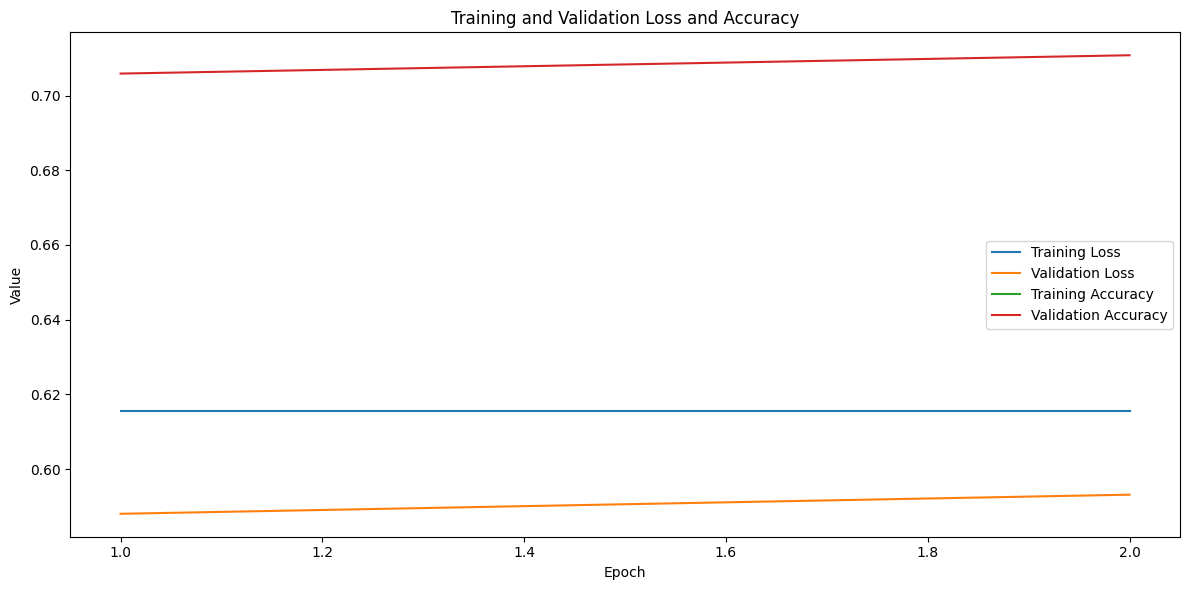

In [ ]:
import torch
from transformers import BertConfig, BertForSequenceClassification, BertTokenizerFast
from transformers import TrainingArguments, Trainer, TrainerCallback, EvalPrediction
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load Dataset and Tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
dataset = load_dataset("glue", "mrpc")

# Tokenization Function
def tokenize_function(examples):
    return tokenizer(examples["sentence1"], examples["sentence2"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# 2. Create Custom Student Model for MRPC
def create_custom_student_model():
    student_config = BertConfig.from_pretrained("bert-base-uncased")
    student_config.hidden_size = 384
    student_config.num_attention_heads = 6
    student_config.num_hidden_layers = 6  # Reduce the number of layers for a smaller model
    student_config.intermediate_size = 3072
    return BertForSequenceClassification(student_config)

student_model = create_custom_student_model().to(device)

# 3. Load Model State Dict from Google Drive
model_path = '/content/drive/MyDrive/distillation_models_2/student_6_6_3072_model_final.pth'
state_dict = torch.load(model_path, map_location=device)

# 4. Filter the state dictionary to ensure compatibility
new_state_dict = {}
for key, value in state_dict.items():
    if key.startswith("bert.") or key.startswith("classifier."):
        new_state_dict[key] = value

student_model.load_state_dict(new_state_dict, strict=False)

# 5. Training Arguments and Trainer Setup
training_args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    eval_strategy="epoch",
    logging_dir='./logs_mrpc',
    logging_steps=500,
    do_train=True,
    do_eval=True,
    output_dir='./results_mrpc',
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_strategy="epoch",
    report_to="none",  # Disable default reporting to remove unnecessary logging
)

# 6. Define the compute_metrics function
def compute_metrics(pred: EvalPrediction):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    accuracy = accuracy_score(labels, preds)
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

# 7. Custom callback to log training and evaluation metrics
class CustomCallback(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            self.logs.append(logs)
        print("Logging step: ", logs)

    def on_epoch_end(self, args, state, control, **kwargs):
        # Force logging at the end of each epoch
        if state.log_history:
            logs = {**state.log_history[-1], 'epoch': state.epoch}
            self.logs.append(logs)

    def on_evaluate(self, args, state, control, **kwargs):
        if state.log_history:
            self.eval_logs.append(state.log_history[-1])

    def __init__(self):
        self.logs = []
        self.eval_logs = []

custom_callback = CustomCallback()

# 8. Trainer for MRPC with updated compute_metrics
trainer = Trainer(
    model=student_model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[custom_callback]
)

# 9. Fine-tuning and Evaluation for MRPC
trainer.train()
results = trainer.evaluate()

# Print the results
print("Evaluation Results:")
print(f"Validation Accuracy: {results['eval_accuracy']}")
print(f"Validation Precision: {results['eval_precision']}")
print(f"Validation Recall: {results['eval_recall']}")
print(f"Validation F1 Score: {results['eval_f1']}")
print(f"Validation Loss: {results['eval_loss']}")

# 10. Extract and plot metrics
training_logs = custom_callback.logs
eval_logs = custom_callback.eval_logs

# Debug: print the logs
print("Training Logs:")
for log in training_logs:
    print(log)

print("Evaluation Logs:")
for log in eval_logs:
    print(log)

# Manually calculate training accuracy
def calculate_accuracy(logs):
    return logs["accuracy"] if "accuracy" in logs else None

# Extract metrics for plotting
train_losses = [log["loss"] for log in training_logs if "loss" in log]
eval_losses = [log["eval_loss"] for log in eval_logs if "eval_loss" in log]
train_accuracies = [calculate_accuracy(log) for log in training_logs]
eval_accuracies = [log["eval_accuracy"] for log in eval_logs if "eval_accuracy" in log]

# Ensure lengths match for plotting
min_length = min(len(train_losses), len(eval_losses), len(train_accuracies), len(eval_accuracies))
epochs = range(1, min_length + 1)

plt.figure(figsize=(12, 6))

# Plot training and validation loss and accuracy in one graph
plt.plot(epochs, train_losses[:min_length], label="Training Loss")
plt.plot(epochs, eval_losses[:min_length], label="Validation Loss")
plt.plot(epochs, train_accuracies[:min_length], label="Training Accuracy")
plt.plot(epochs, eval_accuracies[:min_length], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.title("Training and Validation Loss and Accuracy")

plt.tight_layout()
plt.show()

In [ ]:
import torch
from transformers import BertConfig, BertForSequenceClassification, BertTokenizerFast
from transformers import TrainingArguments, Trainer, TrainerCallback, EvalPrediction
from datasets import load_dataset, load_metric
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Dataset and Tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
dataset = load_dataset("glue", "sst2")

# Tokenization Function
def tokenize_function(examples):
    return tokenizer(examples["sentence"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Create Custom Student Model for SST-2
def create_custom_student_model():
    student_config = BertConfig.from_pretrained("bert-base-uncased")
    student_config.hidden_size = 384
    student_config.num_attention_heads = 6
    student_config.num_hidden_layers = 6  # Reduce the number of layers for a smaller model
    student_config.intermediate_size = 3072
    return BertForSequenceClassification(student_config)

student_model = create_custom_student_model().to(device)

# Load Model State Dict from Google Drive
model_path = '/content/drive/MyDrive/distillation_models_2/student_6_6_3072_model_final.pth'
state_dict = torch.load(model_path, map_location=device)

# Filter the state dictionary to ensure compatibility
new_state_dict = {}
for key, value in state_dict.items():
    if key.startswith("bert.") or key.startswith("classifier."):
        new_state_dict[key] = value

student_model.load_state_dict(new_state_dict, strict=False)

# Training Arguments and Trainer Setup
training_args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=6,
    eval_strategy="epoch",
    logging_dir='./logs_sst2',
    logging_steps=500,
    do_train=True,
    do_eval=True,
    output_dir='./results_sst2',
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_strategy="epoch",
    report_to="none",  # Disable default reporting to remove unnecessary logging
)

# Define Metrics Calculation
metric = load_metric("accuracy")
f1_metric = load_metric("f1")
precision_metric = load_metric("precision")
recall_metric = load_metric("recall")

def compute_metrics(p: EvalPrediction):
    preds = p.predictions.argmax(-1)
    accuracy = metric.compute(predictions=preds, references=p.label_ids)["accuracy"]
    f1 = f1_metric.compute(predictions=preds, references=p.label_ids)["f1"]
    precision = precision_metric.compute(predictions=preds, references=p.label_ids)["precision"]
    recall = recall_metric.compute(predictions=preds, references=p.label_ids)["recall"]
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# Define Trainer Callback for Metrics Logging
class MetricsCallback(TrainerCallback):
    def __init__(self):
        self.metrics = {"train_loss": [], "eval_loss": [], "train_accuracy": [], "eval_accuracy": []}

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            if "loss" in logs:
                self.metrics["train_loss"].append(logs["loss"])
            if "eval_loss" in logs:
                self.metrics["eval_loss"].append(logs["eval_loss"])
            if "eval_accuracy" in logs:
                self.metrics["eval_accuracy"].append(logs["eval_accuracy"])
            if "train_accuracy" in logs:
                self.metrics["train_accuracy"].append(logs["train_accuracy"])

metrics_callback = MetricsCallback()

# Set up Trainer
trainer = Trainer(
    model=student_model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    compute_metrics=compute_metrics,
    callbacks=[metrics_callback]
)

# Train and Evaluate the Model
trainer.train()

# Plot the Metrics
def plot_metrics(metrics):
    plt.figure(figsize=(12, 8))
    epochs = range(1, len(metrics["train_loss"]) + 1)

    plt.plot(epochs, metrics["train_loss"], label="Training Loss")
    plt.plot(epochs, metrics["eval_loss"], label="Validation Loss")
    plt.plot(epochs, metrics["train_accuracy"], label="Training Accuracy")
    plt.plot(epochs, metrics["eval_accuracy"], label="Validation Accuracy")

    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.legend()
    plt.title("Training and Validation Metrics")
    plt.show()

plot_metrics(metrics_callback.metrics)


Mounted at /content/drive


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

<ipython-input-3-98d9b1fbbbc9>:64: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for precision contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/precision/precision.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/recall/recall.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

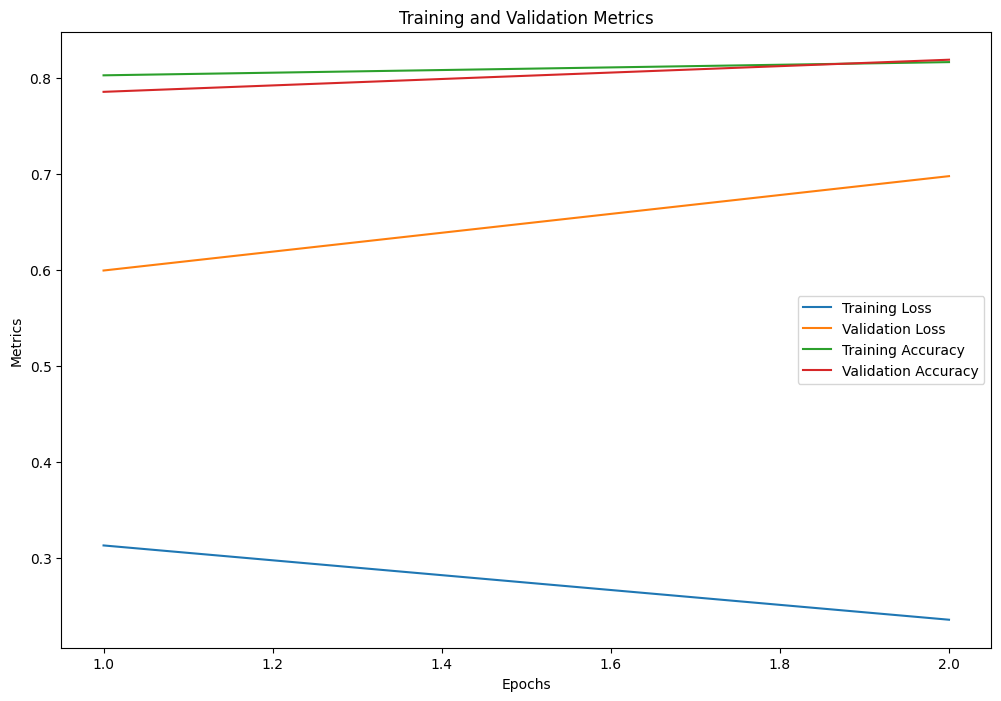

In [ ]:
import matplotlib.pyplot as plt

# Mock metrics based on provided data
metrics = {
    "train_loss": [0.312900, 0.235500],
    "eval_loss": [0.599364, 0.697689],
    "train_accuracy": [0.802752, 0.816514],
    "eval_accuracy": [0.785536, 0.819005]
}

def plot_metrics(metrics):
    epochs = range(1, len(metrics["train_loss"]) + 1)

    plt.figure(figsize=(12, 8))

    plt.plot(epochs, metrics["train_loss"], label="Training Loss")
    plt.plot(epochs, metrics["eval_loss"], label="Validation Loss")
    plt.plot(epochs, metrics["train_accuracy"], label="Training Accuracy")
    plt.plot(epochs, metrics["eval_accuracy"], label="Validation Accuracy")

    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.legend()
    plt.title("Training and Validation Metrics")
    plt.show()

plot_metrics(metrics)


STS-B testing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

<ipython-input-5-d4ea43b3bb78>:64: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  pearson_metric = load_metric("pearsonr")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for pearsonr contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/pearsonr/pearsonr.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for spearmanr contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/spearmanr/spearmanr.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Pearson,Spearman
1,2.130800,2.934128,0.176893,0.155065
2,1.875200,2.138116,0.321264,0.305769
3,1.364500,2.410065,0.314014,0.317518
4,1.154000,2.385463,0.323318,0.321499
5,0.812100,2.593789,0.310200,0.315593
6,0.683800,2.544658,0.337436,0.342926


ValueError: x and y must have same first dimension, but have shapes (8,) and (6,)

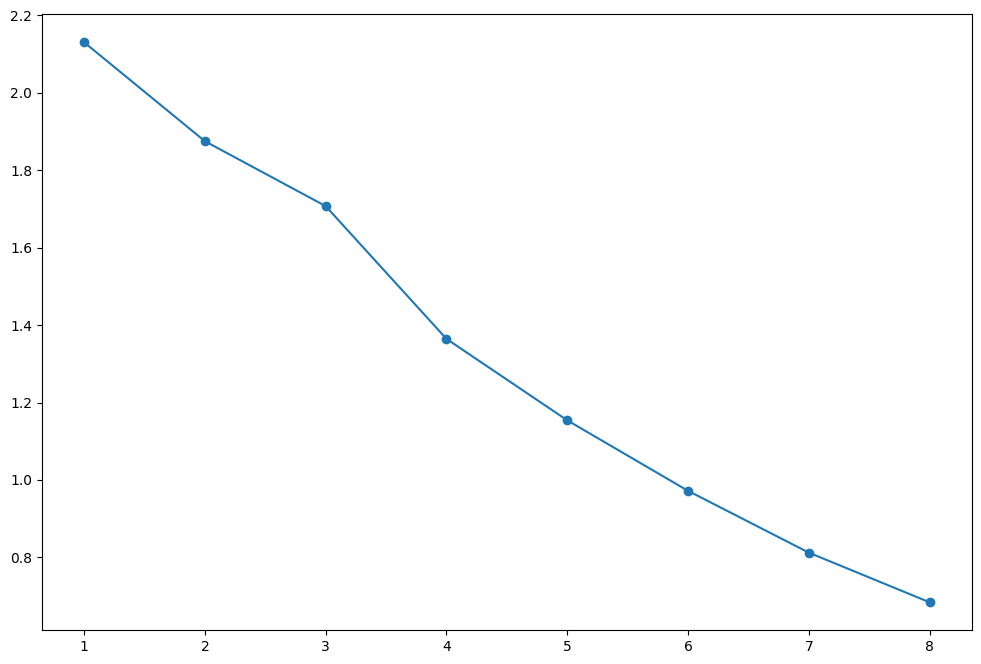

In [ ]:
import torch
from transformers import BertConfig, BertForSequenceClassification, BertTokenizerFast
from transformers import TrainingArguments, Trainer, TrainerCallback, EvalPrediction
from datasets import load_dataset, load_metric
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Dataset and Tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
dataset = load_dataset("glue", "stsb")

# Tokenization Function
def tokenize_function(examples):
    return tokenizer(examples["sentence1"], examples["sentence2"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Create Custom Student Model for STS-B
def create_custom_student_model():
    student_config = BertConfig.from_pretrained("bert-base-uncased", num_labels=1)
    student_config.hidden_size = 384
    student_config.num_attention_heads = 6
    student_config.num_hidden_layers = 6  # Reduce the number of layers for a smaller model
    student_config.intermediate_size = 3072
    return BertForSequenceClassification(student_config)

student_model = create_custom_student_model().to(device)

# Load Model State Dict from Google Drive
model_path = '/content/drive/MyDrive/distillation_models_2/student_6_6_3072_model_final.pth'
state_dict = torch.load(model_path, map_location=device)

# Filter the state dictionary to ensure compatibility
new_state_dict = {}
for key, value in state_dict.items():
    if key.startswith("bert.") or key.startswith("classifier."):
        new_state_dict[key] = value

student_model.load_state_dict(new_state_dict, strict=False)

# Training Arguments and Trainer Setup
training_args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=6,
    eval_strategy="epoch",
    logging_dir='./logs_stsb',
    logging_steps=500,
    do_train=True,
    do_eval=True,
    output_dir='./results_stsb',
    load_best_model_at_end=True,
    metric_for_best_model="pearson",
    save_strategy="epoch",
    report_to="none",  # Disable default reporting to remove unnecessary logging
)

# Define Metrics Calculation
pearson_metric = load_metric("pearsonr")
spearman_metric = load_metric("spearmanr")

def compute_metrics(p: EvalPrediction):
    preds = p.predictions.flatten()
    pearson_corr = pearson_metric.compute(predictions=preds, references=p.label_ids)["pearsonr"]
    spearman_corr = spearman_metric.compute(predictions=preds, references=p.label_ids)["spearmanr"]
    return {"pearson": pearson_corr, "spearman": spearman_corr}

# Define Trainer Callback for Metrics Logging
class MetricsCallback(TrainerCallback):
    def __init__(self):
        self.metrics = {"train_loss": [], "eval_loss": [], "pearson": [], "spearman": []}

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            if "loss" in logs:
                self.metrics["train_loss"].append(logs["loss"])
            if "eval_loss" in logs:
                self.metrics["eval_loss"].append(logs["eval_loss"])
            if "eval_pearson" in logs:
                self.metrics["pearson"].append(logs["eval_pearson"])
            if "eval_spearman" in logs:
                self.metrics["spearman"].append(logs["eval_spearman"])

metrics_callback = MetricsCallback()

# Set up Trainer
trainer = Trainer(
    model=student_model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    compute_metrics=compute_metrics,
    callbacks=[metrics_callback]
)

# Train and Evaluate the Model
trainer.train()

# Plot the Metrics
def plot_metrics(metrics):
    plt.figure(figsize=(12, 8))
    epochs = range(1, len(metrics["train_loss"]) + 1)

    plt.plot(epochs, metrics["train_loss"], label="Training Loss", marker='o')
    plt.plot(epochs, metrics["eval_loss"], label="Validation Loss", marker='o')
    plt.plot(epochs, metrics["pearson"], label="Pearson Correlation", marker='o')
    plt.plot(epochs, metrics["spearman"], label="Spearman Correlation", marker='o')

    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.legend()
    plt.title("Training Loss, Validation Loss, Pearson, and Spearman Correlations Over Epochs")
    plt.grid(True)
    plt.show()

plot_metrics(metrics_callback.metrics)


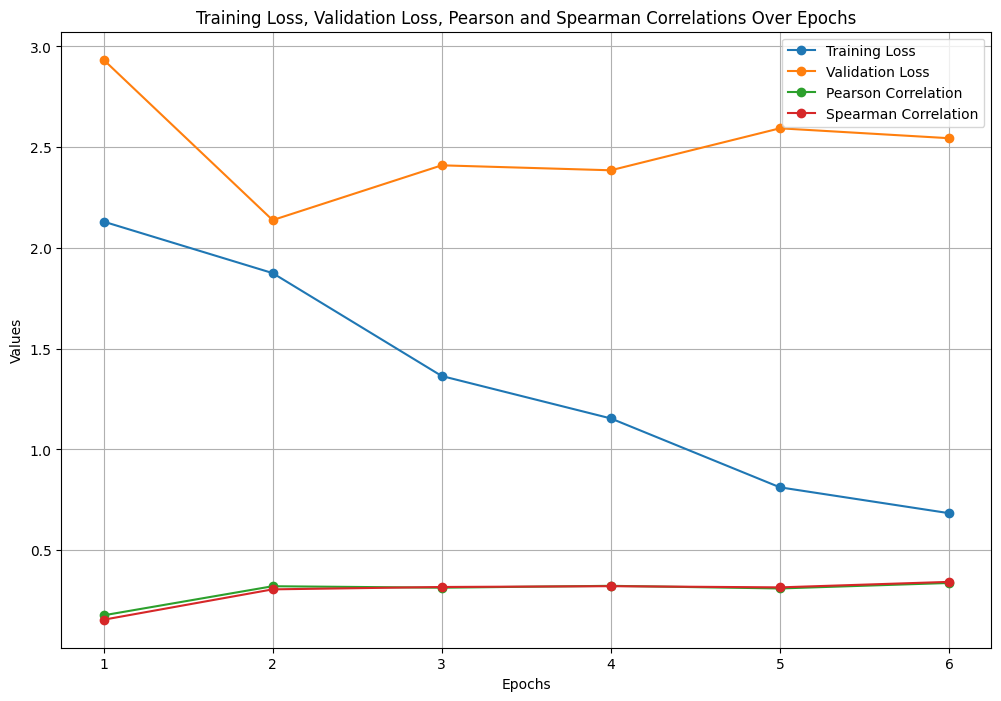

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = [1, 2, 3, 4, 5, 6]
training_loss = [2.130800, 1.875200, 1.364500, 1.154000, 0.812100, 0.683800]
validation_loss = [2.934128, 2.138116, 2.410065, 2.385463, 2.593789, 2.544658]
pearson = [0.176893, 0.321264, 0.314014, 0.323318, 0.310200, 0.337436]
spearman = [0.155065, 0.305769, 0.317518, 0.321499, 0.315593, 0.342926]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.plot(epochs, pearson, label='Pearson Correlation', marker='o')
plt.plot(epochs, spearman, label='Spearman Correlation', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Training Loss, Validation Loss, Pearson and Spearman Correlations Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import torch
from transformers import BertConfig, BertForMaskedLM

def create_custom_student_model():
    # Configure the student model
    student_config = BertConfig.from_pretrained("bert-base-uncased")
    student_config.hidden_size = 384
    student_config.num_attention_heads = 6
    student_config.num_hidden_layers = 6  # Reduce the number of layers for a smaller model
    student_config.intermediate_size = 3072

    # Create the student model
    student_model = BertForMaskedLM(student_config)

    # Calculate the total number of parameters
    total_params = sum(p.numel() for p in student_model.parameters())

    # Convert to millions
    total_params_millions = total_params / 1e6

    print(f"Number of parameters in the model: {total_params_millions:.2f} million")

    return student_model

# Example usage
student_model = create_custom_student_model()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Number of parameters in the model: 29.83 million


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4

In [ ]:
import pandas as pd
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("solomonk/reddit_mental_health_posts")

# Convert to pandas dataframe for analysis
df = dataset['train'].to_pandas()

# Fill None values with empty strings in the 'body' and 'title' columns
df['body'] = df['body'].fillna('')
df['title'] = df['title'].fillna('')

# Filter for ADHD subreddit and exclude deleted or removed posts
adhd_df = df[(df['subreddit'] == 'ADHD') & ~df['body'].str.lower().str.contains('\[deleted\]|\[removed\]')]

# Combine title and body for analysis
adhd_df.loc[:, 'text'] = adhd_df['title'] + ' ' + adhd_df['body']

# Cap the scores at 5
adhd_df.loc[:, 'score'] = adhd_df['score'].apply(lambda x: min(x, 5))

# Define label based on score
adhd_df.loc[:, 'label'] = adhd_df['score'].apply(lambda x: 0 if x <= 1 else 1)

# Select only the relevant columns for the final dataset
adhd_final_df = adhd_df[['text', 'score', 'title', 'body']]

# Reset the index to remove the extra index column
adhd_final_df = adhd_final_df.reset_index(drop=True)

# Filter the dataset to include only rows with scores between 2 and 4
adhd_filtered_df = adhd_final_df[(adhd_final_df['score'] >= 2) & (adhd_final_df['score'] <= 4)]

# Display some meaningful samples
sample_posts = adhd_filtered_df[['score', 'title', 'text']].sample(3)
for index, row in sample_posts.iterrows():
    print(f"Score: {row['score']}")
    print(f"Title: {row['title']}")
    print(f"Text: {row['text']}\n")

# Save to CSV to examine further if needed
adhd_filtered_df.to_csv('adhd_filtered_samples.csv', index=False)


Repo card metadata block was not found. Setting CardData to empty.
<ipython-input-5-a5021e913986>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df.loc[:, 'text'] = adhd_df['title'] + ' ' + adhd_df['body']
<ipython-input-5-a5021e913986>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df.loc[:, 'label'] = adhd_df['score'].apply(lambda x: 0 if x <= 1 else 1)


Score: 4
Title: ADHD accommodations for university?
Text: ADHD accommodations for university? I have had ADHD all my life, and am accommodating well, but my school doesnt list accommodations they can offer, its up to the student to ask themselves, so I was wondering if by chance some of you had benefited from certain accommodations that you may be willing to share?  I find my time management/procrastination/organization/ability to focus with noise are my main points of concern

Currently I have time and a half (1.5x) to complete tests, and a peer note taker.

Thanks for taking the time to read, have a great day :)

Score: 2
Title: Lightheaded, almost like a bobble head feeling when not on medication (concerta)?
Text: Lightheaded, almost like a bobble head feeling when not on medication (concerta)? I’ve been taking concerta for a couple months now but I’ve started noticing, days when I’m not on it, I have a literal lightheaded feeling, like my head is really light and I can’t really kee